In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# 1. Load the data into the pandas environment and identify some basic details of the dataset.
 

In [2]:
df=pd.read_csv("employee.csv")

In [3]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [4]:
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 2. Reset the index as "name" as the index. 

In [5]:
df = pd.read_csv('employee.csv', index_col='name')

In [6]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:

df.loc[["Jack Morgan","Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [8]:
df1=df[df["department"]=="Sales"]
df2=df[df["department"]=="Finance"]
pd.concat([df1,df2])


,age,income,gender,department,grade,performance_score
name,,,,,,
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 5. Display employee who has more than 700 performance score.

In [9]:
df[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score.

In [11]:
df[(df['performance_score']>500)&(df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [12]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'performance_score'}>,
        <AxesSubplot:>]], dtype=object)

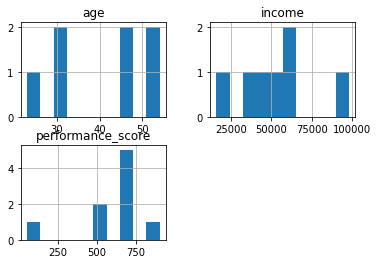

In [13]:
df.hist()

In [16]:
df['age']=df['age'].fillna(df['age'].median())
df['income']=df['income'].fillna(df['income'].median())
df['gender']=df['gender'].fillna('M')

In [17]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,M,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,M,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 8. Check the outliers and handle outliers in performance score using Percentiles.

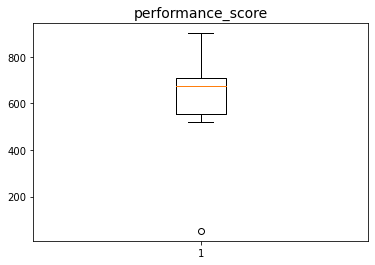

In [18]:
plt.figure()
plt.boxplot(df['performance_score'])
plt.title("performance_score",fontsize=14)
plt.show()


In [ ]:
Here there is only one outlier ,we need to remove this.

In [20]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

Q1 =  556.0 
Q2 =  674.0 
Q3 =  711.0


In [21]:
IQR=Q3-Q1
print('IQR = ',IQR)

IQR =  155.0


In [22]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

Upper limit =  943.5 
Lower limit =  323.5


In [24]:
outlier=[]
for x in df['performance_score']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
outlier

[53]

In [27]:
ind1=df['performance_score']<low_lim
df.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

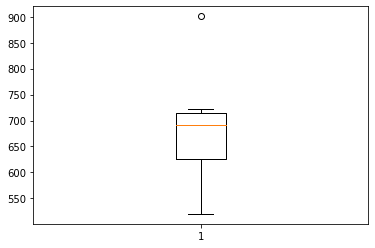

In [34]:
plt.boxplot(df['performance_score'])
plt.show()

# 9. Check the gender column and do Dummy encoding.

In [35]:
df=pd.get_dummies(df,columns=['gender'])
df

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0,1
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,0,1
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10.Do the standard scaling on the feature performance score.

In [37]:
df[['performance_score']]

,performance_score
name,
Allen Smith,723
S Kumar,520
Jack Morgan,674
Ying Chin,556
Dheeraj Patel,711
Satyam Sharma,649
Josh Wills,901
Leo Duck,709


In [39]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
df[['performance_score']]=standardisation.fit_transform(df[['performance_score']])
df[['performance_score']]=pd.DataFrame(df[['performance_score']])
df[['performance_score']]

,performance_score
name,
Allen Smith,0.392262
S Kumar,-1.475872
Jack Morgan,-0.058667
Ying Chin,-1.144578
Dheeraj Patel,0.281831
Satyam Sharma,-0.288733
Josh Wills,2.030331
Leo Duck,0.263425
